# DDO4MLA Practice 6.

# Nonlinear Regression

## Introduction

As opposed to linear regression, in nonlinear regression data are modeled by a function which is a nonlinear combination of the independent variables and the model parameters. This nonlinearity results in the exceptional flexibility to construct more sophisticated models than the ones available via linear regression. In the following exercises, we will be dealing with a particular nonlinear relationship, although nonlinear regression allows using any nonlinear model.

## Exercise 1

We assume to have one independent variable $x$ and one dependent variable $y$. The following rational function will be used to model the relationship between $x$ and $y$:

$$\hat{f}(x,a,b)=\frac{P(x, a)}{Q(x, b)},$$

where $a\in\mathbb{R}^p$ and $b\in\mathbb{R}^q$ are coefficients of the polynomial functions $P(x,a)$ and $Q(x,b)$ respectively. The polynomial functions $P(x,a)$ and $Q(x,b)$ are defined as follows:

$$P(x,a)=\sum_{j=1}^pa_jx^{j-1},$$
$$Q(x,b)=1+\sum_{k=1}^qb_jx^k,$$

where $p$ and $q$ are the numbers of coefficients of the polynomial functions $P(x,a)$ and $Q(x,b)$ respectively.

#### Task 1.1

Implement the polynomial function $P(x,a)$ in the cell below.

In [2]:
import numpy as np

def P(x, a):
  """
  Computes P(x, a)
  Arguments:
      x: a scalar argument
      a: a vector of coefficients of P(x, a)
  Returns:
      P(x, a)
  """
  # ToDo:
  # Hint: use list comprehension
  return np.sum([a[j - 1] * x ** (j - 1) for j in range(1, a.size + 1)])

Compute $P(x,a)$ for given $x$ and $a$. The output should be $307$.

In [3]:
x = 5
a = np.array([2, 1, 2, 2])
P(x, a)

307

#### Task 1.2

Implement the polynomial function $Q(x,b)$ in the cell below.

In [4]:
def Q(x, b):
  """
  Computes Q(x, b)
  Arguments:
      x: a scalar argument
      b: a vector of coefficients of Q(x, b)
  Returns:
      Q(x, b)
  """
  # ToDo:
  # Hint: use list comprehension
  return 1 + np.sum([b[k - 1] * x ** k for k in range(1, b.size + 1)])

Compute $Q(x,a)$ for given $x$ and $b$. The output should be $123$.

In [5]:
x = 2
b = np.array([3, 3, 5, 4])
Q(x, b)

123

#### Task 1.3

Implement the rational function $\hat{f}(x,a,b)$ in the cell below.

In [6]:
def f_hat(x, a, b):
  """
  Computes f_hat(x, a, b)
  Arguments:
      x: a scalar argument
      a: a vector of coefficients of P(x, a)
      b: a vector of coefficients of Q(x, b)
  Returns:
      f_hat(x, a, b)
  """
  # ToDo: 
  return P(x, a) / Q(x, b)

Compute $\hat{f}(x,a,b)$ for given $x$, $a$ and $b$. The output should be $0.203$.

In [7]:
x = 3
a = np.array([2, 1, 3, 2])
b = np.array([3, 1, 3, 4])
print(np.around(f_hat(x, a, b), 3))

0.203


## Exercise 2

Similarly to the linear least squares approach used for linear regression, the optimization problem for nonlinear regression is formulated as:

$$\min_{a,b}J(x,a,b,y)=\frac{1}{2}\sum_{i=1}^n(y_i-\hat{f}(x_i,a,b))^2,$$

where $J(x,a,b,y)$ is the objective function, $x\in\mathbb{R}^n$ is a vector containing samples of the independent variable, $y\in\mathbb{R}^n$ is a vector containing samples of the dependent variable, $n$ is the number of samples in the dataset, and $\hat{f}(x_i,a,b)$ is a nonlinear function.

Despite the seeming similarity with the linear least squares approach, this type of regression is nonlinear because function $\hat{f}(x,a,b)$ cannot be expressed as a linear combination of powers of $x$ and parameters $a$ and $b$.

#### Task 2.1

Implement the objective function $J(x,a,b,y)$ in the cell below.

In [8]:
def J(x, a, b, y):
  """
  Computes J(x, a, b, y)
  Arguments:
      x: a vector of inputs
      a: a vector of coefficients of P(x, a)
      b: a vector of coefficients of Q(x, b)
      y: a vector of outputs
  Returns:
      J(x, a, b, y)
  """
  # ToDo:
  # Hint: use list comprehension and zip with two variables
  return .5 * np.sum([(y_i - f_hat(x_i, a, b)) ** 2 for x_i, y_i in zip(x, y)])

Compute $J(x,a,b,y)$ for given $x$, $a$, $b$ and $y$. The output should be $14.208$

In [9]:
x = np.array([4, 6, 3, 2])
a = np.array([2, 1, 3, 2])
b = np.array([3, 1, 3, 4])
y = np.array([2, 2, 3, 4])
print(np.around(J(x, a, b, y), 3))

14.208


#### Task 2.2

Derive the partial derivative $\frac{\partial J}{\partial a_l}$ where $a_l$ is an element of $a$ and $l=1,\dots,p$.

**ToDo**

$$\frac{\partial J}{\partial a_l}=\sum_{i=1}^n(y_i-\hat{f}(x_i,a,b))\bigg(-\frac{x_i^{l-1}}{Q(x_i,b)}\bigg)$$

Implement it as a function.

In [10]:
def dJda_l(x, a, b, y, l):
  """
  Computes the partial derivative of J(x, a, b, y) w.r.t. a_l
  Arguments:
      x: a scalar argument
      a: a vector of coefficients of P(x, a)
      b: a vector of coefficients of Q(x, b)
      y: a scalar output
      l: an index of the element of the vector a
  Returns:
      Partial derivative of J(x, a, b, y) w.r.t. a_l
  """
  # ToDo:
  return np.sum([(y_i - f_hat(x_i, a, b)) * (-x_i ** (l - 1) / Q(x_i, b)) for x_i, y_i in zip(x, y)])

Compute $\frac{\partial J}{\partial a_l}$ for given $x$, $a$, $b$, $y$ and $l=1,\dots,4$. The output should be:

-0.046

-0.102

-0.243

-0.64

In [11]:
x = np.array([4, 6, 3, 2])
a = np.array([2, 1, 3, 2])
b = np.array([3, 1, 3, 4])
y = np.array([2, 2, 3, 4])
for l in range(1, 5):
  print(np.around(dJda_l(x, a, b, y, l), 3))

-0.046
-0.102
-0.243
-0.64


#### Task 2.3

Derive the partial derivative $\frac{\partial J}{\partial b_l}$ where $b_l$ is an element of $b$ and $l=1,\dots,q$.

**ToDo**

$$\frac{\partial J}{\partial b_l}=\sum_{i=1}^n(y_i-\hat{f}(x_i,a,b))\frac{x_i^lP(x_i,a)}{Q^2(x_i,b)}=\sum_{i=1}^n(y_i-\hat{f}(x_i,a,b))\frac{x_i^l\hat{f}(x_i,a,b)}{Q(x_i,b)}$$

Implement it as a function.

In [12]:
def dJdb_l(x, a, b, y, l):
  """
  Computes the partial derivative of J(x, a, b, y) w.r.t. b_l
  Arguments:
      x: a scalar argument
      a: a vector of coefficients of P(x, a)
      b: a vector of coefficients of Q(x, b)
      y: a scalar output
      l: an index of the element of the vector b
  Returns:
      Partial derivative of J(x, a, b, y) w.r.t. b_l
  """
  # ToDo:
  return np.sum([(y_i - f_hat(x_i, a, b)) * (x_i ** l * f_hat(x_i, a, b) / Q(x_i, b)) for x_i, y_i in zip(x, y)])

Compute $\frac{\partial J}{\partial b_l}$ for given $x$, $a$, $b$, $y$ and $l=1,\dots,4$. The output should be:

0.029

0.065

0.153

0.395

In [13]:
x = np.array([4, 6, 3, 2])
a = np.array([2, 1, 3, 2])
b = np.array([3, 1, 3, 4])
y = np.array([2, 2, 3, 4])
for l in range(1, 5):
  print(np.around(dJdb_l(x, a, b, y, l), 3))

0.029
0.065
0.153
0.395


#### Task 2.4

The gradients of $J(x,a,b,y)$ w.r.t. $a$ and $b$ are vectors of partial derivatives w.r.t. $a_j$ and $b_k$ respectively, namely:

$$\nabla_aJ(x,a,b,y)=\begin{bmatrix}\frac{\partial J}{\partial a_1} & \frac{\partial J}{\partial a_2} & \dots & \frac{\partial J}{\partial a_p}\end{bmatrix}^T,$$

$$\nabla_bJ(x,a,b,y)=\begin{bmatrix}\frac{\partial J}{\partial b_1} & \frac{\partial J}{\partial b_2} & \dots & \frac{\partial J}{\partial b_q}\end{bmatrix}^T.$$

Implement these two gradients as functions in the cell below using functions **dJda_l(x, a, b, y, l)** and **dJdb_l(x, a, b, y, l)** from the previous tasks.

In [14]:
def dJda(x, a, b, y):
  """
  Computes the gradient of J(x, a, b, y) w.r.t. the vector a
  Arguments:
      x: a scalar argument
      a: a vector of coefficients of P(x, a)
      b: a vector of coefficients of Q(x, b)
      y: a scalar output
  Returns:
      Gradient of J(x, a, b, y) w.r.t. the vector a
  """
  # ToDo:
  return np.array([dJda_l(x, a, b, y, l) for l in range(1, a.size + 1)])

def dJdb(x, a, b, y):
  """
  Computes the gradient of J(x, a, b, y) w.r.t. the vector b
  Arguments:
      x: a scalar argument
      a: a vector of coefficients of P(x, a)
      b: a vector of coefficients of Q(x, b)
      y: a scalar output
  Returns:
      Gradient of J(x, a, b, y) w.r.t. the vector b
  """
  # ToDo:
  return np.array([dJdb_l(x, a, b, y, l) for l in range(1, b.size + 1)])

Compute $\nabla_aJ(x,a,b,y)$ and $\nabla_bJ(x,a,b,y)$ for given $x$, $a$, $b$ and $y$. The output should be:

[-0.046 -0.102 -0.243 -0.64 ]

[0.029 0.065 0.153 0.395]

In [15]:
x = np.array([4, 6, 3, 2])
a = np.array([2, 1, 3, 2])
b = np.array([3, 1, 3, 4])
y = np.array([2, 2, 3, 4])
print(np.around(dJda(x, a, b, y,), 3))
print(np.around(dJdb(x, a, b, y,), 3))

[-0.046 -0.102 -0.243 -0.64 ]
[0.029 0.065 0.153 0.395]


## Exercise 3

To determine the optimal parameters $a$ and $b$ we have to solve the optimization problem formulated in **Excerise 2**. The objective function is highly nonlinear and hence lacks the closed-form solution leading to iterative optimization. To solve the optimization problem we will use the Broyden–Fletcher–Goldfarb–Shanno (BFGS) algorithm from the SciPy library. Unlike Newton's method, it uses gradients to approximate the inverse Hessian of the objective function. This is why we needed to derive the gradients in the previous exercise: they will be supplied to the BFGS algorithm.

We would also like to make a comparison between linear and nonlinear regression. First, we define the class **LLSestimator** that provides the functionality of linear regression based on the linear least squares approach. It has the method **fit(x, y)** that estimates the parameters of the linear model, and the method **predict(x)** that predicts the outputs for the given inputs. The private method **genA(x)** is used to generate the matrix $A$ containing the powers of $x$ as in the previous practice, which takes part in the implementation of the methods **fit(x, y)** and **predict(x)**.

In [16]:
import numpy.linalg as la

class LLSestimator:
  """
  Linear least squares estimator
  """

  def __init__(self, m):
    """
    Creates a linear least squares estimator
    Arguments:
        m: a degree of the polynomial
    Returns:
        Linear least squares estimator
    """
    self.m = m

  def __genA(self, x):
    """
    Generates the matrix A containing powers of x from 0 to m
    Arguments:
        x: a vector of inputs
    Returns:
        The matrix A containing powers of x from 0 to m
    """
    # Allocate memory for the matrix
    A = np.zeros((x.size, self.m + 1))

    # Fill the first (ones) and the second (first power of x) column
    A[:, 0] = np.ones(x.size)
    A[:, 1] = x

    # Fill the rest columns (powers of x from 2 to m)
    for i in range(2, self.m + 1):
      A[:, i] = x ** i

    # Return the matrix A
    return A

  def fit(self, x, y):
    """
    Estimates the parameters w of the model
    Arguments:
        x: a vector of inputs
        y: a vector of outputs
    """
    # Generate the matrix A
    A = self.__genA(x)

    # Compute the parameters w
    self.w = np.dot(la.inv(np.dot(A.T, A)), np.dot(A.T, y))

  def predict(self, x):
    """
    Predicts the outputs based on the input
    Arguments:
        x: a vector of inputs
    Returns:
        The vector of outputs
    """
    # Generate the matrix A
    A = self.__genA(x)

    # Return the outputs
    return np.dot(A, self.w)

Further we define the class **NLLSestimator** for estimating the parameters of the nonlinear relationship $\hat{f}(x,a,b)$ described earlier. It uses the BFGS method from SciPy library to determine optimal $a$ and $b$. The SciPy implementation of BFGS requires two functions namely the objective function **obj(w)** and the gradient of the objective function **grad(w)**. The only argument of these functions is the vector $w$ being a concatentation of vectors $a$ and $b$. Analogously, the function **grad(w)** should return a concatenation of the gradients $\nabla_aJ(x,a,b,y)$ and $\nabla_bJ(x,a,b,y)$. The private method **w2ab(w)** splits the vector $w$ into the vectors $a$ and $b$ so that the methods **obj(w)** and **grad(w)** are compatible with the functions **dJda(x, a, b, y)** and **dJdb(x, a, b, y)** from the previous excercises, and can be called from the SciPy implementation of the BFGS method. The method **fit(x, y)** estimates the parameters $a$ and $b$ using the BFGS algorithm, and the method **predict(x)** predicts the outputs based on the given inputs.

In [17]:
from scipy.optimize import minimize

class NLLSestimator:
  """
  Nonlinear least squares estimator
  """

  def __init__(self, p, q):
    """
    Creates a nonlinear least squares estimator
    Arguments:
        p: a degree of the polynomial P(x, a)
        q: a degree of the polynomial Q(x, b)
    Returns:
        Nonlinear least squares estimator
    """
    self.p = p
    self.q = q

  def __w2ab(self, w):
    """
    Splits the vector w into the vectors a and b
    Arguments:
        w: a vector of the model parameters from BFGS
    Returns:
        The vectors a and b
    """
    # Extract the vector a
    a = w[0:self.p]

    # Extract the vector b
    b = w[self.p:]

    # Return a, b
    return a, b

  def __obj(self, w):
    """
    The objective function for the BFGS method
    Arguments:
        w: a vector of the model parameters from BFGS
    Returns:
        The vectors a and b
    """
    # Split w into a and b
    a, b = self.__w2ab(w)

    # Return J(x, a, b, y)
    return J(x, a, b, y)

  def __grad(self, w):
    """
    The gradient of the objective function for the BFGS method
    Arguments:
        w: a vector of the model parameters from BFGS
    Returns:
        The gradient for the BFGS method
    """
    # Split w into a and b
    a, b = self.__w2ab(w)

    # Compute dJda(x, a, b, y) and dJdb(x, a, b, y)
    dJda_val = dJda(x, a, b, y)
    dJdb_val = dJdb(x, a, b, y)

    # Construct the BFGS gradient
    grad = np.concatenate([dJda_val, dJdb_val])

    # Return the BFGS gradient
    return grad

  def fit(self, x, y):
    """
    Estimates the parameters w of the model using the BFGS method
    Arguments:
        x: a vector of inputs
        y: a vector of outputs
    """
    # Run the optimization via the BFGS method
    w0 = np.zeros((self.p + self.q, 1))
    res = minimize(self.__obj, w0, method='BFGS', jac=self.__grad,
                options={'disp': True})

    # Extract the results
    a, b = self.__w2ab(res.x)

    # Save the results
    self.a = a
    self.b = b

  def predict(self, x):
    """
    Predicts the outputs based on the input
    Arguments:
        x: a vector of inputs
    Returns:
        The vector of outputs
    """
    # Return the outputs
    return np.array([f_hat(x_i, self.a, self.b) for x_i in x])

Now we generate the dataset to compare linear and nonlinear regression. The data are assumed to be measurements of the step response of a low-pass filter. We generate the dataset by evaluating the following function (step response) at $10$ equidistant points between $x_1=0$ and $x_2=1.25$:

$$f(x)=V_{in}(1-e^{-\frac{x}{RC}}),$$

where $V_{in}=5$$, R = 4.7\times10^3$, and $C = 33\times10^{-6}$.

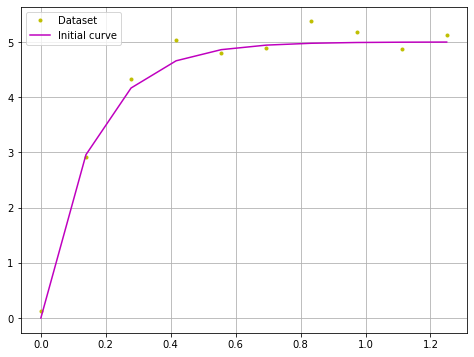

In [18]:
import matplotlib.pyplot as plt

def f(x):
  """
  Original function f(x)
  Arguments:
      x: a vector of inputs
  Returns:
      The vector of outputs
  """
  return 5 * (1 - np.exp(-x / (4.7e+3 * 33e-6)))

# Define the number of samples
n = 10

# Define the sampling boundaries
x1 = 0.00
x2 = 1.25

# Define the noise parameters
mean = 0
std = .25

# Ensure reproducibility by making random number generator produce the same 
# values at new executions
np.random.seed(42)

# Generate the initial and the noisy samples
x = np.linspace(x1, x2, n)
y_initial = f(x)
y = y_initial + np.random.normal(mean, std, n)

# Plot the samples
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'y.')
plt.plot(x, y_initial, 'm-')
plt.legend(['Dataset', 'Initial curve'])
plt.grid()
plt.show()

Now let us create and fit the models for both linear and nonlinear regression. After that, we use the estimators to predict the outputs for the same inputs they were fitted on.

Optimization terminated successfully.
         Current function value: 0.125555
         Iterations: 73
         Function evaluations: 78
         Gradient evaluations: 78


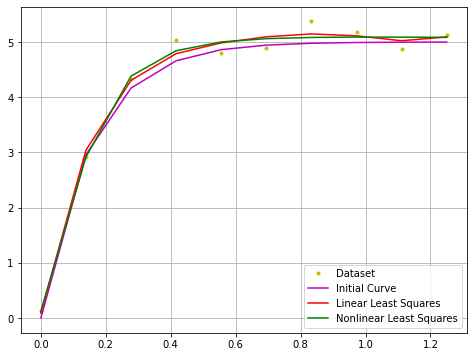

In [19]:
# Create and fit the linear least squares estimator
lls = LLSestimator(5)
lls.fit(x, y)

# Create and fit the nonlinear least squares estimator
nlls = NLLSestimator(3, 2)
nlls.fit(x, y)

# Predict the outputs using both types of regression
y_lls = lls.predict(x)
y_nlls = nlls.predict(x)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'y.')
plt.plot(x, y_initial, 'm-')
plt.plot(x, y_lls, 'r-')
plt.plot(x, y_nlls, 'g-')
plt.legend(['Dataset', 'Initial Curve', 'Linear Least Squares', 'Nonlinear Least Squares'])
plt.grid()
plt.show()

At the first glance, both linear and nonlinear regression accomplished the task. Let us take a closer look at the points between $x_1=0.25$ and $x_2=1.5$. Note that the values starting from $x=1.25$ are beyond the initial dataset: they should reveal the extrapolation capabilities of both types of regression. 

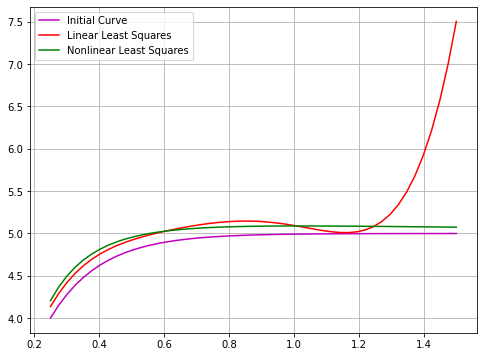

In [20]:
# Define the new number of samples
n_new = 50

# Define the new sampling boundaries
x1_new = 0.25
x2_new = 1.50

# Generate the initial samples for the new sampling boundaries
x_new = np.linspace(x1_new, x2_new, n_new)
y_initial_new = f(x_new)

# Predict values using LLS and NLLS within the new boundaries
y_lls_new = lls.predict(x_new)
y_nlls_new = nlls.predict(x_new)

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(x_new, y_initial_new, 'm-')
plt.plot(x_new, y_lls_new, 'r-')
plt.plot(x_new, y_nlls_new, 'g-')
plt.legend(['Initial Curve', 'Linear Least Squares', 'Nonlinear Least Squares'])
plt.grid()
plt.show()

In the beginning linear regression demonstrates slight oscillations in comparison to the steady behavior of nonlinear regression. Starting from $x=1.25$ linear regression drastically increases and tends to infinity, whereas nonlinear regression stays practically constant as suggested by the original function $f(x)$. Thus, unlike linear regression, nonlinear regression is able to capture the asymptotic behavior and extrapolate a function having asymptotic properties.

In the course of these exercises, we have worked with one particular nonlinear function, however, nonlinear regression is not limited by a certain kind of function: any nonlinear function can be subjected to nonlinear regression. Nevertheless, it can be quite difficult to properly choose a suitable nonlinear function, since we have to have some insights into the process or phenomenon behind the dataset. Thus, when working with data of unknown nature the best option is to start with linear regression, and if it fails to adequately capture the behavior of the data then go to nonlinear regression.